In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
#import os
#os.getcwd()

In [3]:
import pandas as pd
import glob, os


files = glob.glob('/Users/selinzobu/Desktop/TILES/TILES Data/omsignal/features/*.csv')
#print(len(files)) #199 participants
#print (files)

#['samples_for_so\\a.csv', 'samples_for_so\\b.csv', 'samples_for_so\\c.csv']


#OM = pd.concat([pd.read_csv(fp).assign(participant_id=os.path.basename(fp)) for fp in files])
#print (len(OM))

In [4]:
all_dfs = []

for file in files:
    #print(f'Loading {file}')
    new_df = pd.read_csv(file, usecols= ['Timestamp',
       'AvgBreathingDepth','AvgBreathingRate', 'AvgGForce', 'AvgHeartRate', 
        'AvgXAccel_g', 'AvgYAccel_g', 'AvgZAccel_g',  'RMSStdDev_ms', 'RRPeakCoverage', 'SDNN_ms', 'StdDevBreathingDepth',
       'StdDevBreathingRate', 'StdDevGForce', 'StdDevXAccel_g',
       'StdDevYAccel_g', 'StdDevZAccel_g'])
    new_df['participant_id'] = f'{file}'
    
    all_dfs.append(new_df)

In [5]:
p2 = pd.read_csv('/Users/selinzobu/Desktop/TILES/TILES Data/omsignal/features/ba240e43-900d-4477-8718-b9487ed24d7d.csv', parse_dates = ['Timestamp'])

print((p2.columns))
print((p2.head()))

Index(['Timestamp', 'BreathingDepth', 'BreathingRate', 'Cadence', 'HeartRate',
       'Intensity', 'Steps', 'AngleFromVertical_rad', 'AvgBreathingDepth',
       'AvgBreathingRate', 'AvgGForce', 'AvgHeartRate', 'AvgXAccel_g',
       'AvgYAccel_g', 'AvgZAccel_g', 'Sitting', 'Supine', 'LowGCoverage',
       'RMSStdDev_ms', 'RRPeakCoverage', 'SDNN_ms', 'StdDevBreathingDepth',
       'StdDevBreathingRate', 'StdDevGForce', 'StdDevXAccel_g',
       'StdDevYAccel_g', 'StdDevZAccel_g', 'RR0', 'RR1', 'RR2', 'RR3'],
      dtype='object')
                  Timestamp  BreathingDepth  BreathingRate  Cadence  \
0 2018-05-12 18:52:28-07:00             NaN            NaN      NaN   
1 2018-05-12 18:52:29-07:00             NaN            NaN      0.0   
2 2018-05-12 18:52:30-07:00             NaN            NaN      0.0   
3 2018-05-12 18:52:31-07:00             NaN            NaN      0.0   
4 2018-05-12 18:52:32-07:00             NaN            NaN      0.0   

   HeartRate  Intensity  Steps  AngleFro

In [6]:
print(len(all_dfs)) #199 particip
print(type(all_dfs[0]))
print(type(all_dfs))

199
<class 'pandas.core.frame.DataFrame'>
<class 'list'>


In [7]:
OM = pd.concat(all_dfs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [8]:
#drop a row if any of its values are missing

print(OM.shape)#(167037652, 18)
OM.dropna(how = 'any', inplace = True)
print(OM.shape)#(551765, 18)

(167037652, 18)
(551765, 18)


In [9]:
print(OM.head())

                          Timestamp  AvgBreathingDepth  AvgBreathingRate  \
300   2018-05-07T06:26:31.000-07:00           8.383838         22.034967   
601   2018-05-07T06:31:31.000-07:00           9.117117         25.456288   
901   2018-05-07T06:36:31.000-07:00           5.438202         19.447249   
1201  2018-05-07T06:41:31.000-07:00           4.780822         19.361490   
1502  2018-05-07T06:46:31.000-07:00           5.352941         20.724051   

      AvgGForce  AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  \
300    0.126191     92.308322    -0.700388     0.351154    -0.346906   
601    0.381981    104.606228    -0.805678     0.234999    -0.198497   
901    0.045566     73.867437    -0.976104     0.027229    -0.063092   
1201   0.036021     72.912969    -0.974498     0.052450    -0.054859   
1502   0.040741     74.607701    -0.975783     0.041124    -0.092610   

      RMSStdDev_ms  RRPeakCoverage     SDNN_ms  StdDevBreathingDepth  \
300      32.039420        0.977160   9

In [10]:
OM['participant_id'] = OM['participant_id'].map(lambda x: x.rstrip('.csv')).map(lambda x: x.replace('/Users/selinzobu/Desktop/TILES/TILES Data/omsignal/features/', ''))

In [11]:
print(OM['participant_id'].head())

300     e6081755-d7f3-4c26-ab40-0709b8ad41ef
601     e6081755-d7f3-4c26-ab40-0709b8ad41ef
901     e6081755-d7f3-4c26-ab40-0709b8ad41ef
1201    e6081755-d7f3-4c26-ab40-0709b8ad41ef
1502    e6081755-d7f3-4c26-ab40-0709b8ad41ef
Name: participant_id, dtype: object


In [12]:
os.makedirs('/Users/selinzobu/Desktop/TILES/', exist_ok=True)  
OM.to_csv('/Users/selinzobu/Desktop/TILES/OMSignal1.csv') 

In [13]:
#Continue from here

import pandas as pd
import numpy as np
from pandas import Series, DataFrame

OM = pd.read_csv('/Users/selinzobu/Desktop/TILES/OMSignal1.csv', parse_dates = ['Timestamp'])
OM = OM.loc[:, ~OM.columns.str.contains('^Unnamed')]

In [4]:
print(OM.head()) #(551765, 18) OM

                   Timestamp  AvgBreathingDepth  AvgBreathingRate  AvgGForce  \
0  2018-05-07 06:26:31-07:00           8.383838         22.034967   0.126191   
1  2018-05-07 06:31:31-07:00           9.117117         25.456288   0.381981   
2  2018-05-07 06:36:31-07:00           5.438202         19.447249   0.045566   
3  2018-05-07 06:41:31-07:00           4.780822         19.361490   0.036021   
4  2018-05-07 06:46:31-07:00           5.352941         20.724051   0.040741   

   AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  RMSStdDev_ms  \
0     92.308322    -0.700388     0.351154    -0.346906     32.039420   
1    104.606228    -0.805678     0.234999    -0.198497     49.802333   
2     73.867437    -0.976104     0.027229    -0.063092     65.734821   
3     72.912969    -0.974498     0.052450    -0.054859     61.004179   
4     74.607701    -0.975783     0.041124    -0.092610     56.445098   

   RRPeakCoverage     SDNN_ms  StdDevBreathingDepth  StdDevBreathingRate  \
0        0

In [5]:
a = OM[(OM['RMSStdDev_ms'] < 213) & (OM['RMSStdDev_ms'] > 8)]#[551765 rows x 18 columns]
b = a[(OM['SDNN_ms'] < 172.7) & (OM['SDNN_ms'] > 6.7)]
c = b[(OM['AvgBreathingRate'] < 36.1) & (OM['AvgBreathingRate'] > 8)]


/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_2838/3098611546.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = a[(OM['SDNN_ms'] < 172.7) & (OM['SDNN_ms'] > 6.7)]
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_2838/3098611546.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = b[(OM['AvgBreathingRate'] < 36.1) & (OM['AvgBreathingRate'] > 8)]


In [6]:
OM['AvgBreathingRate'].describe()

count    551765.000000
mean         23.444021
std           4.806554
min           0.000000
25%          20.357085
50%          23.092198
75%          26.119213
max          66.518828
Name: AvgBreathingRate, dtype: float64

In [7]:
c['AvgBreathingRate'].describe()

count    505945.000000
mean         23.197437
std           4.212908
min           8.104384
25%          20.259476
50%          22.941271
75%          25.884799
max          36.098129
Name: AvgBreathingRate, dtype: float64

In [8]:
OM['SDNN_ms'].describe()

count    551765.000000
mean         67.928352
std          42.508634
min           0.000000
25%          40.410949
50%          56.798410
75%          82.046285
max         486.145657
Name: SDNN_ms, dtype: float64

In [9]:
c['SDNN_ms'].describe()

count    505945.000000
mean         64.508403
std          31.920786
min           6.928203
25%          41.464853
50%          56.751704
75%          79.297587
max         172.699689
Name: SDNN_ms, dtype: float64

In [10]:
OM['RMSStdDev_ms'].describe()

count    551765.000000
mean         50.364258
std          42.200098
min           0.000000
25%          21.745541
50%          36.968546
75%          64.143900
max         550.069087
Name: RMSStdDev_ms, dtype: float64

In [11]:
c['RMSStdDev_ms'].describe()

count    505945.000000
mean         47.445887
std          34.489413
min           8.001742
25%          22.753948
50%          36.966747
75%          61.062154
max         212.978872
Name: RMSStdDev_ms, dtype: float64

In [ ]:
#RMSSD (heart rate variability) 8 - 213

#SDNN (heart rate variability) 6.7 - 172.7

#Average breathing rate 8 - 36.1

In [12]:
ao = OM[(OM['RMSStdDev_ms'] > 213) | (OM['RMSStdDev_ms'] < 8)] #21771
bo = OM[(OM['SDNN_ms'] > 172.7) | (OM['SDNN_ms'] < 6.7)] #24192
co = OM[(OM['AvgBreathingRate'] > 36.1) | (OM['AvgBreathingRate'] < 8)] #9140

print(len(ao))
print(len(bo))
print(len(co))

print((ao.index))
print()
print((bo.index))
print()
print((co.index))

21771
24192
9140
Int64Index([   984,   2654,   2978,   3529,   4195,   4214,   4215,   4283,
              4320,   4377,
            ...
            548773, 549234, 549236, 549864, 549866, 549875, 549888, 549892,
            549893, 550576],
           dtype='int64', length=21771)

Int64Index([    47,     55,    160,    174,    317,    406,    409,    587,
               648,    868,
            ...
            548312, 548318, 548322, 548323, 548325, 549234, 549236, 550754,
            550755, 550756],
           dtype='int64', length=24192)

Int64Index([  7899,   7900,   7901,   7902,   7903,   7937,   7963,   8011,
              8012,   8048,
            ...
            551585, 551632, 551693, 551700, 551721, 551722, 551723, 551730,
            551735, 551736],
           dtype='int64', length=9140)


In [13]:
print(ao)

                        Timestamp  AvgBreathingDepth  AvgBreathingRate  \
984     2018-04-24 17:50:03-07:00           4.266667         20.764241   
2654    2018-05-16 06:52:23-07:00           9.912162         30.817734   
2978    2018-05-17 06:52:01-07:00          10.410448         27.865116   
3529    2018-05-01 18:49:27-07:00           2.478261         20.334640   
4195    2018-04-17 18:21:08-07:00           3.162162         18.834950   
...                           ...                ...               ...   
549875  2018-04-16 23:05:04-07:00           5.972414         35.105877   
549888  2018-04-17 00:10:04-07:00           2.442623         27.199089   
549892  2018-04-17 00:30:04-07:00           5.565891         29.650925   
549893  2018-04-17 00:35:04-07:00           5.275591         29.764159   
550576  2018-04-20 04:10:09-07:00           5.312500         30.717452   

        AvgGForce  AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  \
984      0.035644     55.650023    -0

In [14]:
a.shape #(529954, 18)  551765 - 21771

(529954, 18)

In [15]:
b.shape #(513966, 18) 

(513966, 18)

In [16]:
c.shape #(505945, 18)

(505945, 18)

In [17]:
print(c)

                        Timestamp  AvgBreathingDepth  AvgBreathingRate  \
0       2018-05-07 06:26:31-07:00           8.383838         22.034967   
1       2018-05-07 06:31:31-07:00           9.117117         25.456288   
2       2018-05-07 06:36:31-07:00           5.438202         19.447249   
3       2018-05-07 06:41:31-07:00           4.780822         19.361490   
4       2018-05-07 06:46:31-07:00           5.352941         20.724051   
...                           ...                ...               ...   
551760  2018-05-03 09:37:43-07:00           3.666667         20.682584   
551761  2018-05-03 09:42:43-07:00           1.903226         19.484050   
551762  2018-05-03 09:47:43-07:00           3.611111         22.282361   
551763  2018-05-03 09:52:43-07:00           6.482143         20.059969   
551764  2018-05-03 17:48:56-07:00          10.066667         29.113603   

        AvgGForce  AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  \
0        0.126191     92.308322    -0

In [18]:
OM['participant_id'].value_counts()

885170be-d945-427d-bd3a-b0524ddc3105    7303
658adbe4-781c-45f9-92a7-14912fcd0701    6425
0ec84778-1a98-4cd7-aa11-05997ddadd52    6064
6fb467a6-a780-4753-9fda-269594a5b928    5555
fd79ab30-1199-4619-adbd-577d715d86ce    5468
                                        ... 
1b1bcdb5-00eb-4a8c-8c05-a70d678ca0f8     239
a0fce948-41d2-4070-bad2-ab8d17bf97d8     223
803be457-cee4-4f3f-9540-ff574c57c697     143
edec36ec-64c2-4cf8-af5c-99f4c8972d30     102
dcc3e9ff-9c05-4e17-9798-fd5114be77a9      97
Name: participant_id, Length: 199, dtype: int64

In [19]:
c['participant_id'].value_counts()

885170be-d945-427d-bd3a-b0524ddc3105    6807
0ec84778-1a98-4cd7-aa11-05997ddadd52    5865
658adbe4-781c-45f9-92a7-14912fcd0701    5651
6fb467a6-a780-4753-9fda-269594a5b928    5271
05dedb61-63bc-44e3-8e28-a5d32d91f7e9    5183
                                        ... 
997c6352-6724-4985-b48c-9c3f08437964     182
a0fce948-41d2-4070-bad2-ab8d17bf97d8     172
803be457-cee4-4f3f-9540-ff574c57c697     141
edec36ec-64c2-4cf8-af5c-99f4c8972d30     101
dcc3e9ff-9c05-4e17-9798-fd5114be77a9      50
Name: participant_id, Length: 199, dtype: int64

In [20]:
len(c['participant_id'].unique())

199

In [21]:
print(OM.head())

                   Timestamp  AvgBreathingDepth  AvgBreathingRate  AvgGForce  \
0  2018-05-07 06:26:31-07:00           8.383838         22.034967   0.126191   
1  2018-05-07 06:31:31-07:00           9.117117         25.456288   0.381981   
2  2018-05-07 06:36:31-07:00           5.438202         19.447249   0.045566   
3  2018-05-07 06:41:31-07:00           4.780822         19.361490   0.036021   
4  2018-05-07 06:46:31-07:00           5.352941         20.724051   0.040741   

   AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  RMSStdDev_ms  \
0     92.308322    -0.700388     0.351154    -0.346906     32.039420   
1    104.606228    -0.805678     0.234999    -0.198497     49.802333   
2     73.867437    -0.976104     0.027229    -0.063092     65.734821   
3     72.912969    -0.974498     0.052450    -0.054859     61.004179   
4     74.607701    -0.975783     0.041124    -0.092610     56.445098   

   RRPeakCoverage     SDNN_ms  StdDevBreathingDepth  StdDevBreathingRate  \
0        0

In [22]:
print(OM.info()) #participant_id        551765 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551765 entries, 0 to 551764
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             551765 non-null  object 
 1   AvgBreathingDepth     551765 non-null  float64
 2   AvgBreathingRate      551765 non-null  float64
 3   AvgGForce             551765 non-null  float64
 4   AvgHeartRate          551765 non-null  float64
 5   AvgXAccel_g           551765 non-null  float64
 6   AvgYAccel_g           551765 non-null  float64
 7   AvgZAccel_g           551765 non-null  float64
 8   RMSStdDev_ms          551765 non-null  float64
 9   RRPeakCoverage        551765 non-null  float64
 10  SDNN_ms               551765 non-null  float64
 11  StdDevBreathingDepth  551765 non-null  float64
 12  StdDevBreathingRate   551765 non-null  float64
 13  StdDevGForce          551765 non-null  float64
 14  StdDevXAccel_g        551765 non-null  float64
 15  

In [23]:
print(len(c.participant_id.unique())) #199 participants

199


In [27]:
print(c.isna().sum())

Timestamp               0
AvgBreathingDepth       0
AvgBreathingRate        0
AvgGForce               0
AvgHeartRate            0
AvgXAccel_g             0
AvgYAccel_g             0
AvgZAccel_g             0
RMSStdDev_ms            0
RRPeakCoverage          0
SDNN_ms                 0
StdDevBreathingDepth    0
StdDevBreathingRate     0
StdDevGForce            0
StdDevXAccel_g          0
StdDevYAccel_g          0
StdDevZAccel_g          0
participant_id          0
dtype: int64


In [25]:
os.makedirs('/Users/selinzobu/Desktop/TILES/', exist_ok=True)  
c.to_csv('/Users/selinzobu/Desktop/TILES/11OMSignal.csv') 

In [26]:
OM.notna().sum()

Timestamp               551765
AvgBreathingDepth       551765
AvgBreathingRate        551765
AvgGForce               551765
AvgHeartRate            551765
AvgXAccel_g             551765
AvgYAccel_g             551765
AvgZAccel_g             551765
RMSStdDev_ms            551765
RRPeakCoverage          551765
SDNN_ms                 551765
StdDevBreathingDepth    551765
StdDevBreathingRate     551765
StdDevGForce            551765
StdDevXAccel_g          551765
StdDevYAccel_g          551765
StdDevZAccel_g          551765
participant_id          551765
dtype: int64

In [28]:
print(c)

                        Timestamp  AvgBreathingDepth  AvgBreathingRate  \
0       2018-05-07 06:26:31-07:00           8.383838         22.034967   
1       2018-05-07 06:31:31-07:00           9.117117         25.456288   
2       2018-05-07 06:36:31-07:00           5.438202         19.447249   
3       2018-05-07 06:41:31-07:00           4.780822         19.361490   
4       2018-05-07 06:46:31-07:00           5.352941         20.724051   
...                           ...                ...               ...   
551760  2018-05-03 09:37:43-07:00           3.666667         20.682584   
551761  2018-05-03 09:42:43-07:00           1.903226         19.484050   
551762  2018-05-03 09:47:43-07:00           3.611111         22.282361   
551763  2018-05-03 09:52:43-07:00           6.482143         20.059969   
551764  2018-05-03 17:48:56-07:00          10.066667         29.113603   

        AvgGForce  AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  \
0        0.126191     92.308322    -0

In [29]:
print(type(c["Timestamp"][0]))

<class 'datetime.datetime'>


In [30]:
c["Timestamp"] = pd.to_datetime(c["Timestamp"], utc = True).dt.date

/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_2838/1117039410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c["Timestamp"] = pd.to_datetime(c["Timestamp"], utc = True).dt.date


In [31]:
print(c)

         Timestamp  AvgBreathingDepth  AvgBreathingRate  AvgGForce  \
0       2018-05-07           8.383838         22.034967   0.126191   
1       2018-05-07           9.117117         25.456288   0.381981   
2       2018-05-07           5.438202         19.447249   0.045566   
3       2018-05-07           4.780822         19.361490   0.036021   
4       2018-05-07           5.352941         20.724051   0.040741   
...            ...                ...               ...        ...   
551760  2018-05-03           3.666667         20.682584   0.018323   
551761  2018-05-03           1.903226         19.484050   0.021540   
551762  2018-05-03           3.611111         22.282361   0.028038   
551763  2018-05-03           6.482143         20.059969   0.051138   
551764  2018-05-04          10.066667         29.113603   0.298609   

        AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  RMSStdDev_ms  \
0          92.308322    -0.700388     0.351154    -0.346906     32.039420   
1    

In [32]:
len(c['Timestamp'].unique())

132

In [33]:
# Daily summary statistics of each feature were derived by taking the mean and standard 
#deviation of all the 5min interval values from the same day.

DOM = pd.DataFrame()

DOM['AvgHeartRateM'] = c.groupby(['participant_id', 'Timestamp'])['AvgHeartRate'].mean()
DOM['AvgHeartRateS'] = c.groupby(['participant_id', 'Timestamp'])['AvgHeartRate'].std(ddof=0)
DOM['RMSStdDev_msM'] = c.groupby(['participant_id', 'Timestamp'])['RMSStdDev_ms'].mean()
DOM['RMSStdDev_msS'] = c.groupby(['participant_id', 'Timestamp'])['RMSStdDev_ms'].std(ddof=0)
DOM['AvgBreathingRateM'] = c.groupby(['participant_id', 'Timestamp'])['AvgBreathingRate'].mean()
DOM['AvgBreathingRateS'] = c.groupby(['participant_id', 'Timestamp'])['AvgBreathingRate'].std(ddof=0)
DOM['AvgGForceM'] = c.groupby(['participant_id', 'Timestamp'])['AvgGForce'].mean()
DOM['AvgGForceS'] = c.groupby(['participant_id', 'Timestamp'])['AvgGForce'].std(ddof=0)
DOM['AvgXAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['AvgXAccel_g'].mean()
DOM['AvgXAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['AvgXAccel_g'].std(ddof=0)
DOM['AvgYAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['AvgYAccel_g'].mean()
DOM['AvgYAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['AvgYAccel_g'].std(ddof=0)
DOM['AvgZAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['AvgZAccel_g'].mean()
DOM['AvgZAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['AvgZAccel_g'].std(ddof=0)
DOM['SDNN_msM'] = c.groupby(['participant_id', 'Timestamp'])['SDNN_ms'].mean()
DOM['SDNN_msS'] = c.groupby(['participant_id', 'Timestamp'])['SDNN_ms'].std(ddof=0)
DOM['StdDevBreathingRateM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevBreathingRate'].mean()
DOM['StdDevBreathingRateS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevBreathingRate'].std(ddof=0)
DOM['StdDevBreathingRateM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevBreathingRate'].mean()
DOM['StdDevBreathingRateS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevBreathingRate'].std(ddof=0)
DOM['StdDevGForceM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevGForce'].mean()
DOM['StdDevGForceS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevGForce'].std(ddof=0)
DOM['StdDevXAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevXAccel_g'].mean()
DOM['StdDevXAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevXAccel_g'].std(ddof=0)
DOM['StdDevYAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevYAccel_g'].mean()
DOM['StdDevYAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevYAccel_g'].std(ddof=0)
DOM['StdDevZAccel_gM'] = c.groupby(['participant_id', 'Timestamp'])['StdDevZAccel_g'].mean()
DOM['StdDevZAccel_gS'] = c.groupby(['participant_id', 'Timestamp'])['StdDevZAccel_g'].std(ddof=0)

In [ ]:
#DOM['RRPeakCoverageM'] = OM.groupby(['participant_id', 'Timestamp'])['RRPeakCoverage'].mean()
#DOM['RRPeakCoverageS'] = OM.groupby(['participant_id', 'Timestamp'])['RRPeakCoverage'].std()

In [34]:
DOM.columns #5713 rows × 26 columns

Index(['AvgHeartRateM', 'AvgHeartRateS', 'RMSStdDev_msM', 'RMSStdDev_msS',
       'AvgBreathingRateM', 'AvgBreathingRateS', 'AvgGForceM', 'AvgGForceS',
       'AvgXAccel_gM', 'AvgXAccel_gS', 'AvgYAccel_gM', 'AvgYAccel_gS',
       'AvgZAccel_gM', 'AvgZAccel_gS', 'SDNN_msM', 'SDNN_msS',
       'StdDevBreathingRateM', 'StdDevBreathingRateS', 'StdDevGForceM',
       'StdDevGForceS', 'StdDevXAccel_gM', 'StdDevXAccel_gS',
       'StdDevYAccel_gM', 'StdDevYAccel_gS', 'StdDevZAccel_gM',
       'StdDevZAccel_gS'],
      dtype='object')

In [36]:
(DOM.shape)
DOM

AvgHeartRateM  AvgHeartRateS  \
participant_id                       Timestamp                                  
02581754-36cd-4b23-85ea-bf995c6dec83 2018-04-11      70.316433      11.125610   
                                     2018-04-15      73.011389      14.791072   
                                     2018-04-19      78.227597      13.221363   
                                     2018-04-20      74.730689      14.570413   
                                     2018-04-21      74.438313       9.604453   
...                                                        ...            ...   
fdbd8c07-720c-4ae5-a3d8-aad56b54688  2018-07-09      91.171147       6.568484   
                                     2018-07-10      84.839650       7.616177   
                                     2018-07-11     108.381503       0.000000   
                                     2018-07-12      85.126667       9.343313   
                                     2018-07-13      87.415557       5.907100   

                                                 RMSStdDev_msM  RMSStdDev_msS  \
participant_id                       Timestamp                                  
02581754-36cd-4b23-85ea-bf995c6dec83 2018-04-11      76.304540      32.446035   
                                     2018-04-15      83.218582      29.087928   
                                     2018-04-19      71.881296      31.260648   
                                     2018-04-20      75.876150      34.389385   
                                     2018-04-21      82.330480      29.665782   
...                                                        ...            ...   
fdbd8c07-720c-4ae5-a3d8-aad56b54688  2018-07-09      43.070694      25.915944   
                                     2018-07-10      46.866597      21.012169   
                                     2018-07-11     117.877526       0.000000   
                                     2018-07-12      45.473117      15.195810   
                                     2018-07-13      34.708162       9.637146   

                                                 AvgBreathingRateM  \
participant_id                       Timestamp                       
02581754-36cd-4b23-85ea-bf995c6dec83 2018-04-11          18.785335   
                                     2018-04-15          20.301165   
                                     2018-04-19          21.666127   
                                     2018-04-20          21.342272   
                                     2018-04-21          21.468637   
...                                                            ...   
fdbd8c07-720c-4ae5-a3d8-aad56b54688  2018-07-09          23.185072   
                                     2018-07-10          22.429555   
                                     2018-07-11          26.578179   
                                     2018-07-12          22.622140   
                                     2018-07-13          22.769217   

                                                 AvgBreathingRateS  \
participant_id                       Timestamp                       
02581754-36cd-4b23-85ea-bf995c6dec83 2018-04-11           3.148856   
                                     2018-04-15           4.558011   
                                     2018-04-19           4.542382   
                                     2018-04-20           4.984909   
                                     2018-04-21           4.480558   
...                                                            ...   
fdbd8c07-720c-4ae5-a3d8-aad56b54688  2018-07-09           3.562551   
                                     2018-07-10           2.937347   
                                     2018-07-11           0.000000   
                                     2018-07-12           3.064660   
                                     2018-07-13           2.658898   

                                                 AvgGForceM  AvgGForceS  \
participant_id                       Timesta

In [37]:
DOM.reset_index(level=['participant_id', 'Timestamp'], inplace=True)

In [39]:
DOM.shape #(5713, 28)

(5713, 28)

In [40]:
print(len(DOM['participant_id'].unique()))

199


In [41]:
DOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant_id        5713 non-null   object 
 1   Timestamp             5713 non-null   object 
 2   AvgHeartRateM         5713 non-null   float64
 3   AvgHeartRateS         5713 non-null   float64
 4   RMSStdDev_msM         5713 non-null   float64
 5   RMSStdDev_msS         5713 non-null   float64
 6   AvgBreathingRateM     5713 non-null   float64
 7   AvgBreathingRateS     5713 non-null   float64
 8   AvgGForceM            5713 non-null   float64
 9   AvgGForceS            5713 non-null   float64
 10  AvgXAccel_gM          5713 non-null   float64
 11  AvgXAccel_gS          5713 non-null   float64
 12  AvgYAccel_gM          5713 non-null   float64
 13  AvgYAccel_gS          5713 non-null   float64
 14  AvgZAccel_gM          5713 non-null   float64
 15  AvgZAccel_gS         

In [42]:
os.makedirs('/Users/selinzobu/Desktop/TILES/', exist_ok=True)  
DOM.to_csv('/Users/selinzobu/Desktop/TILES/1DOMSignal.csv') 

In [46]:
print(DOM.isna().sum())

participant_id          0
Timestamp               0
AvgHeartRateM           0
AvgHeartRateS           0
RMSStdDev_msM           0
RMSStdDev_msS           0
AvgBreathingRateM       0
AvgBreathingRateS       0
AvgGForceM              0
AvgGForceS              0
AvgXAccel_gM            0
AvgXAccel_gS            0
AvgYAccel_gM            0
AvgYAccel_gS            0
AvgZAccel_gM            0
AvgZAccel_gS            0
SDNN_msM                0
SDNN_msS                0
StdDevBreathingRateM    0
StdDevBreathingRateS    0
StdDevGForceM           0
StdDevGForceS           0
StdDevXAccel_gM         0
StdDevXAccel_gS         0
StdDevYAccel_gM         0
StdDevYAccel_gS         0
StdDevZAccel_gM         0
StdDevZAccel_gS         0
dtype: int64


In [7]:
#p2["Timestamp"] = pd.to_datetime(p2["Timestamp"]).dt.date

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [44]:
import missingno as msno

<AxesSubplot:>

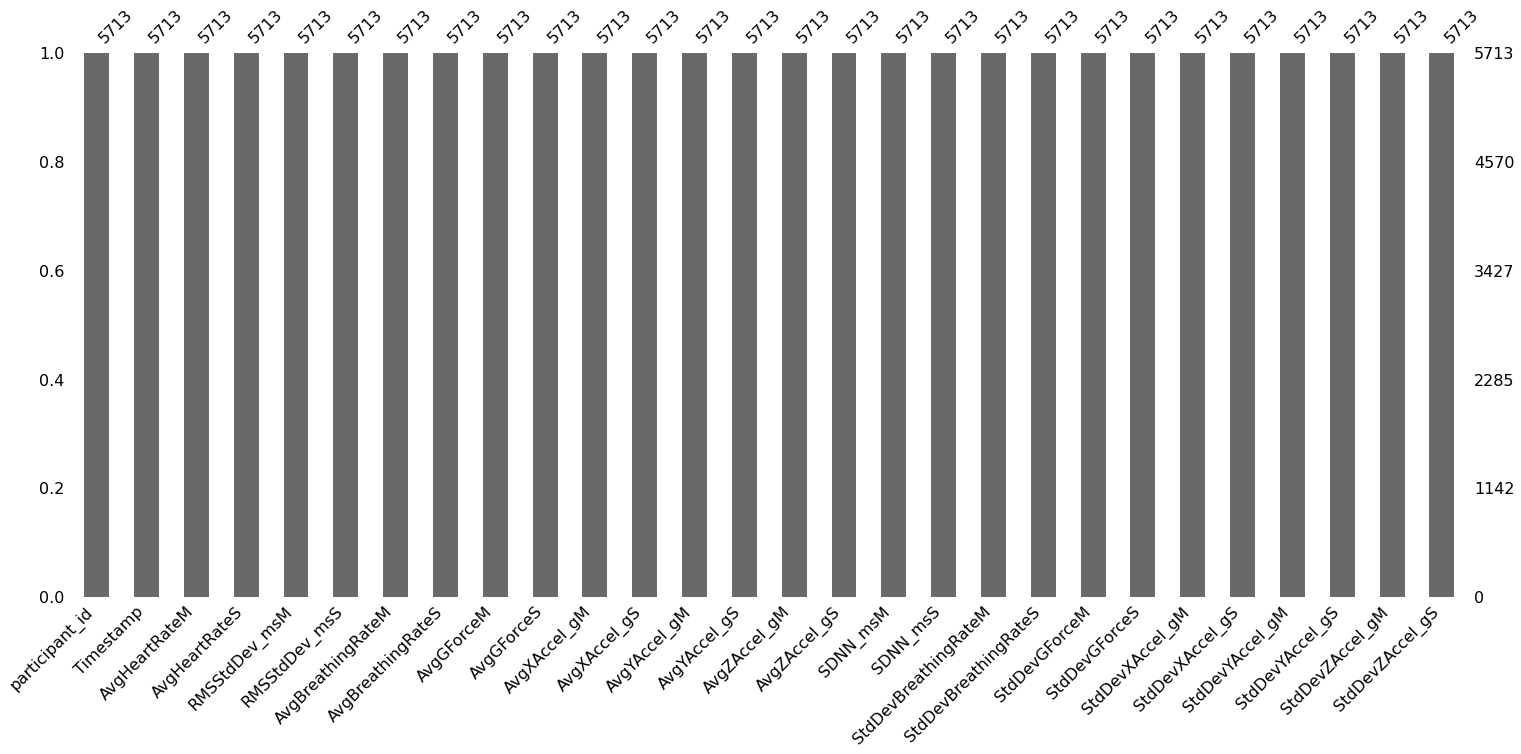

In [45]:
msno.bar(DOM)

In [47]:
#Visualize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

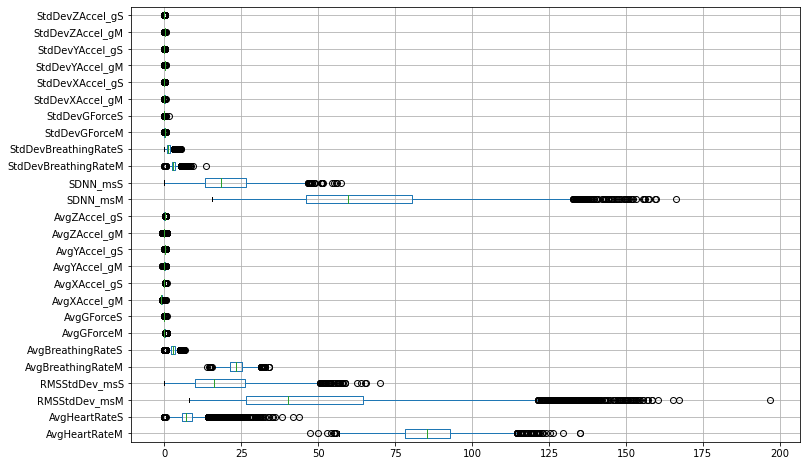

In [48]:
plt.figure(figsize = (12,8))
DOM.boxplot(vert = False)
plt.show()

In [49]:
plt.boxplot(DOM.AvgBreathingDepth, vert = False)

AttributeError: 'DataFrame' object has no attribute 'AvgBreathingDepth'

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05cab5250>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05cab5970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05d33ae80>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05e2670d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05e2677f0>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05e267460>]}

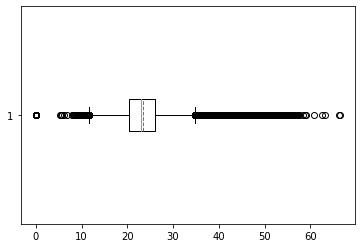

In [38]:
plt.boxplot(OM['AvgBreathingRate'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddcb2536d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddcb253df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddcb253340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddcdccb550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddcdccbc70>],
 'means': [<matplotlib.lines.Line2D at 0x7fddcdccb8e0>]}

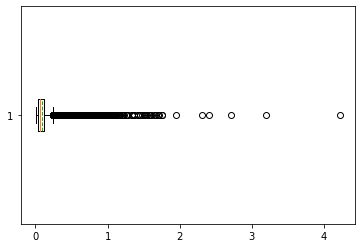

In [39]:
plt.boxplot(OM['AvgGForce'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05ee7be20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddc0b2f580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05ee7ba90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddc0b2fca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc1b00400>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc1b00070>]}

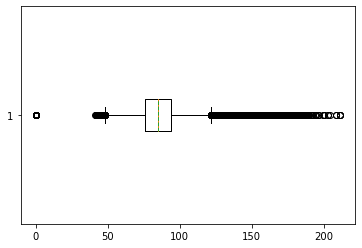

In [40]:
plt.boxplot(OM['AvgHeartRate'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddcf7c0d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddcf7c05b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddcf7cfd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddcf7c0df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05c502f70>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05c5028b0>]}

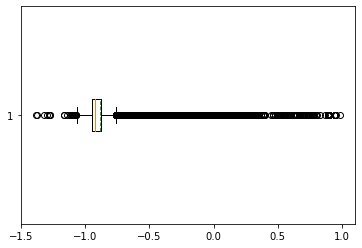

In [41]:
plt.boxplot(OM['AvgXAccel_g'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe697f2a580>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe697f2adf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe68ecc8970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe697f2a070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc7f8b9a0>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc7f8b610>]}

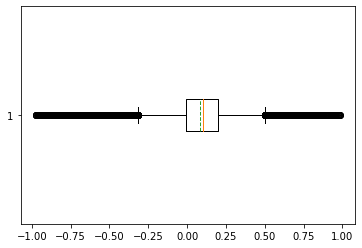

In [42]:
plt.boxplot(OM['AvgYAccel_g'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddce90b2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddce90ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddce919f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05d1d6160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05d1d6880>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05d1d64f0>]}

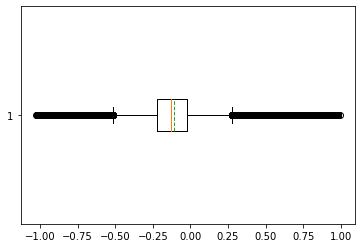

In [43]:
plt.boxplot(OM['AvgZAccel_g'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05cd681c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05cd688e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05cd79df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05cd59040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05cd59760>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05cd593d0>]}

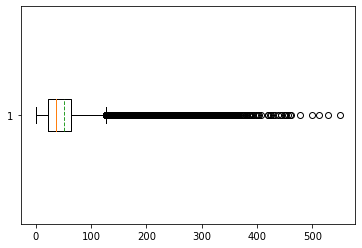

In [44]:
plt.boxplot(OM['RMSStdDev_ms'], meanline = True, showmeans= True, vert= False)

In [36]:
print(OM.columns)

Index(['Timestamp', 'AvgBreathingDepth', 'AvgBreathingRate', 'AvgGForce',
       'AvgHeartRate', 'AvgXAccel_g', 'AvgYAccel_g', 'AvgZAccel_g',
       'RMSStdDev_ms', 'RRPeakCoverage', 'SDNN_ms', 'StdDevBreathingDepth',
       'StdDevBreathingRate', 'StdDevGForce', 'StdDevXAccel_g',
       'StdDevYAccel_g', 'StdDevZAccel_g', 'participant_id'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05c7bdee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05c7ac640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05c7bdb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05c7acd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05c79f4c0>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05c79f130>]}

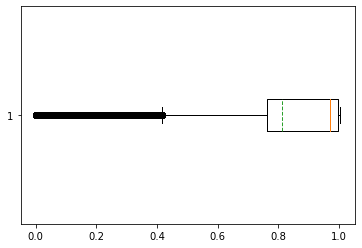

In [45]:
plt.boxplot(OM['RRPeakCoverage'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05f5bec40>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05f5b03a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05f5be8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05f5b0ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05f5a4220>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05f5b0e50>]}

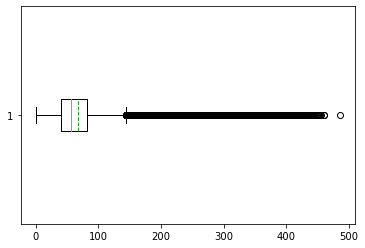

In [46]:
plt.boxplot(OM['SDNN_ms'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05f44d970>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05f43c0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05f44d5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05f43c7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05f43cf10>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05f43cb80>]}

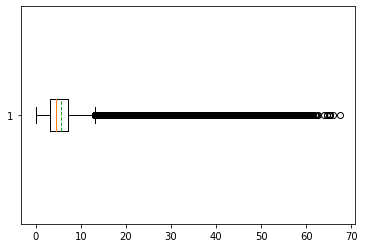

In [47]:
plt.boxplot(OM['StdDevBreathingDepth'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff05ee801c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff05ee808e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff05ee92dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff05ee72040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff05ee72760>],
 'means': [<matplotlib.lines.Line2D at 0x7ff05ee723d0>]}

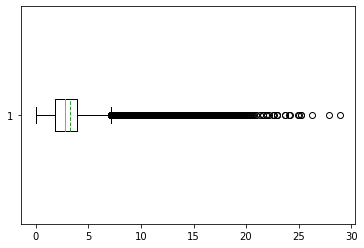

In [48]:
plt.boxplot(OM['StdDevBreathingRate'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddc0b31610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddc0b31d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddc0b31280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddc0b29490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc0b29bb0>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc0b29820>]}

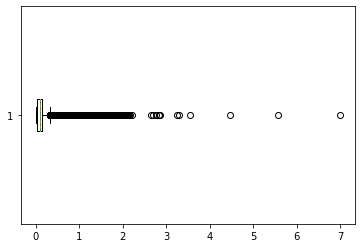

In [49]:
plt.boxplot(OM['StdDevGForce'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddc1b09ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddc3829640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddc1b09b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddc3829d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc381d4c0>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc381d130>]}

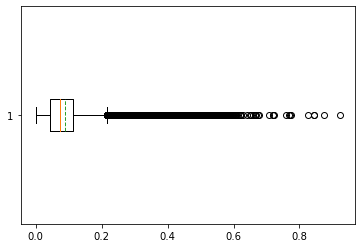

In [50]:
plt.boxplot(OM['StdDevXAccel_g'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddc87c0670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddc87c0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddc87c02e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddc87b14f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc87b1c10>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc87b1880>]}

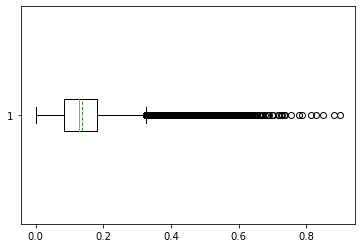

In [51]:
plt.boxplot(OM['StdDevYAccel_g'], meanline = True, showmeans= True, vert= False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddc8693dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddc8682520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddc8693a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddc8682c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddc86763a0>],
 'means': [<matplotlib.lines.Line2D at 0x7fddc8682fd0>]}

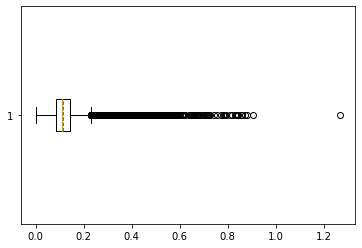

In [52]:
plt.boxplot(OM['StdDevZAccel_g'], meanline = True, showmeans= True, vert= False)

In [54]:
print(OM.head())

                          Timestamp  AvgBreathingDepth  AvgBreathingRate  \
300   2018-05-07T06:26:31.000-07:00           8.383838         22.034967   
601   2018-05-07T06:31:31.000-07:00           9.117117         25.456288   
901   2018-05-07T06:36:31.000-07:00           5.438202         19.447249   
1201  2018-05-07T06:41:31.000-07:00           4.780822         19.361490   
1502  2018-05-07T06:46:31.000-07:00           5.352941         20.724051   

      AvgGForce  AvgHeartRate  AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  \
300    0.126191     92.308322    -0.700388     0.351154    -0.346906   
601    0.381981    104.606228    -0.805678     0.234999    -0.198497   
901    0.045566     73.867437    -0.976104     0.027229    -0.063092   
1201   0.036021     72.912969    -0.974498     0.052450    -0.054859   
1502   0.040741     74.607701    -0.975783     0.041124    -0.092610   

      RMSStdDev_ms  RRPeakCoverage     SDNN_ms  StdDevBreathingDepth  \
300      32.039420        0.977160   9

In [55]:
#Outliers : Z Score

outliers = []
def detect_outliers(data):
    threshold =3
    mean = np.mean(data)
    std = np.std(data)
    
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [56]:
outlier_BD = detect_outliers(OM.AvgBreathingDepth)
print(len(outlier_BD))#5365

5365


In [57]:
outlier_BR = detect_outliers(OM.AvgBreathingRate)
print(len(outlier_BR))#11773

11773


In [58]:
outlier_AF = detect_outliers(OM.AvgGForce)
print(len(outlier_AF))#19399

19399


In [62]:
outlier_HR = detect_outliers(OM.AvgHeartRate)
print(len(outlier_HR))#57001

57001


In [59]:
outlier_AX = detect_outliers(OM.AvgXAccel_g)
print(len(outlier_AX))#30928

30928


In [60]:
outlier_AY = detect_outliers(OM.AvgYAccel_g)
print(len(outlier_AY))#37818

37818


In [61]:
outlier_AZ = detect_outliers(OM.AvgZAccel_g)
print(len(outlier_AZ))#49744

49744


In [64]:
outlier_RMSS = detect_outliers(OM.RMSStdDev_ms)
print(len(outlier_RMSS))#66975?

76949


In [65]:
outlier_RR = detect_outliers(OM.RRPeakCoverage)
print(len(outlier_RR))#76949

76949


In [66]:
outlier_SDNN = detect_outliers(OM.SDNN_ms)
print(len(outlier_SDNN))#86705

86705


In [67]:
outlier_SBD = detect_outliers(OM.StdDevBreathingDepth)
print(len(outlier_SBD))#92581

92581


In [68]:
outlier_SBR = detect_outliers(OM.StdDevBreathingRate)
print(len(outlier_SBR))#105581

105581


In [69]:
outlier_SDF = detect_outliers(OM.StdDevGForce)
print(len(outlier_SDF))#109794

109794


In [70]:
outlier_SX = detect_outliers(OM.StdDevXAccel_g)
print(len(outlier_SX))#118952

118952


In [71]:
outlier_SY = detect_outliers(OM.StdDevYAccel_g)
print(len(outlier_SY))#122388

122388


In [72]:
outlier_SZ = detect_outliers(OM.StdDevZAccel_g)
print(len(outlier_SZ))#127733

127733


In [73]:
#Outliers : Scatter plot & Boxplots
from pylab import rcParams
import seaborn as sns

In [74]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

In [76]:
#sns.boxplot(x = 'days',y = 'NumberSteps', data = OM, palette = 'hls')

In [ ]:
#sns.pairplot(OM, hue = '', palette = 'hls')

<AxesSubplot:xlabel='AvgBreathingDepth', ylabel='Density'>

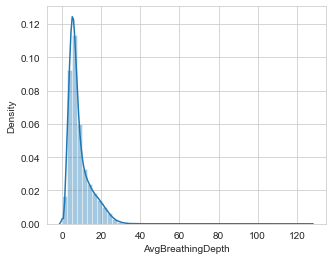

In [78]:
sns.distplot(OM['AvgBreathingDepth'])

<AxesSubplot:xlabel='AvgBreathingRate', ylabel='Density'>

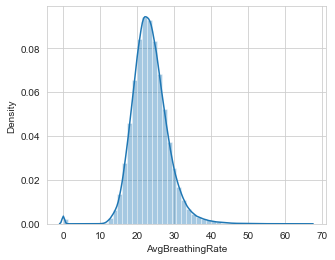

In [79]:
sns.distplot(OM['AvgBreathingRate'])

<AxesSubplot:xlabel='AvgGForce', ylabel='Density'>

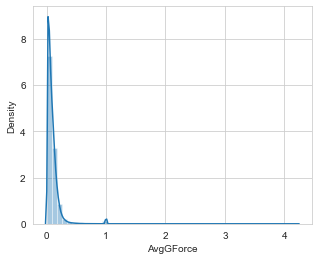

In [80]:
sns.distplot(OM['AvgGForce'])

<AxesSubplot:xlabel='AvgHeartRate', ylabel='Density'>

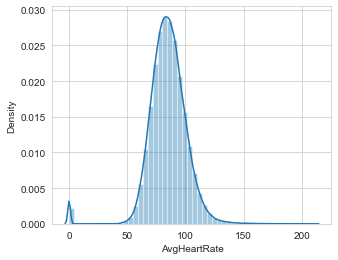

In [81]:
sns.distplot(OM['AvgHeartRate'])

<AxesSubplot:xlabel='AvgXAccel_g', ylabel='Density'>

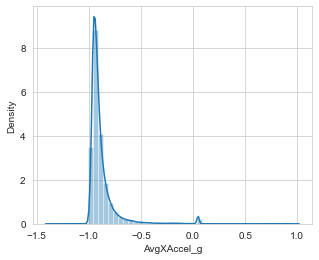

In [82]:
sns.distplot(OM['AvgXAccel_g'])

<AxesSubplot:xlabel='AvgYAccel_g', ylabel='Density'>

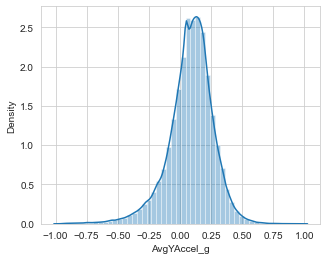

In [83]:
sns.distplot(OM['AvgYAccel_g'])

<AxesSubplot:xlabel='AvgZAccel_g', ylabel='Density'>

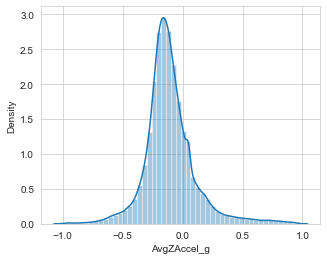

In [84]:
sns.distplot(OM['AvgZAccel_g'])

<AxesSubplot:xlabel='RMSStdDev_ms', ylabel='Density'>

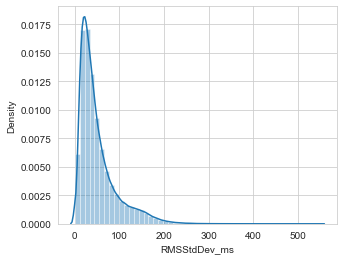

In [85]:
sns.distplot(OM['RMSStdDev_ms'])

<AxesSubplot:xlabel='RRPeakCoverage', ylabel='Density'>

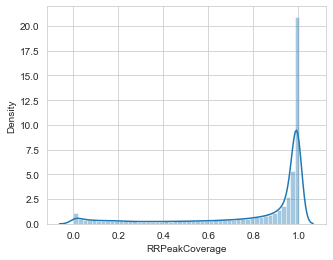

In [86]:
sns.distplot(OM['RRPeakCoverage'])

<AxesSubplot:xlabel='SDNN_ms', ylabel='Density'>

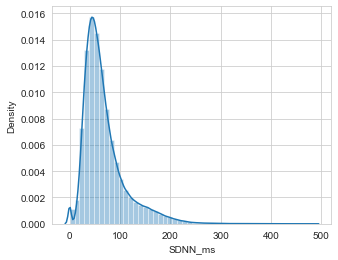

In [87]:
sns.distplot(OM['SDNN_ms'])

<AxesSubplot:xlabel='StdDevBreathingDepth', ylabel='Density'>

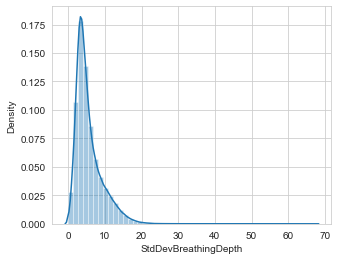

In [88]:
sns.distplot(OM['StdDevBreathingDepth'])

<AxesSubplot:xlabel='StdDevBreathingRate', ylabel='Density'>

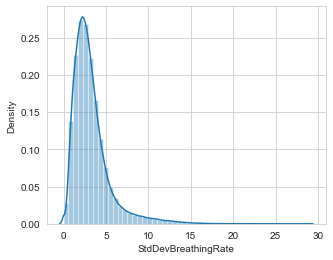

In [89]:
sns.distplot(OM['StdDevBreathingRate'])

<AxesSubplot:xlabel='StdDevGForce', ylabel='Density'>

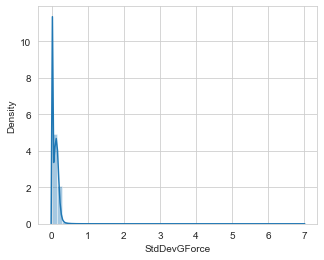

In [90]:
sns.distplot(OM['StdDevGForce'])

<AxesSubplot:xlabel='StdDevXAccel_g', ylabel='Density'>

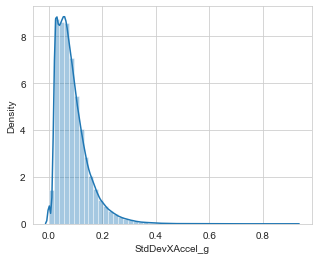

In [91]:
sns.distplot(OM['StdDevXAccel_g'])

<AxesSubplot:xlabel='StdDevYAccel_g', ylabel='Density'>

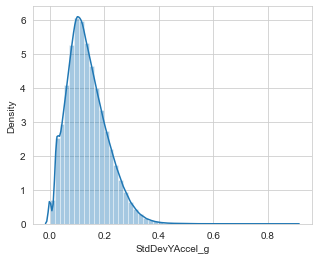

In [92]:
sns.distplot(OM['StdDevYAccel_g'])

<AxesSubplot:xlabel='StdDevZAccel_g', ylabel='Density'>

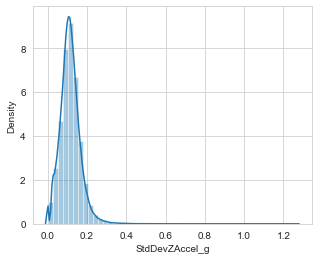

In [93]:
sns.distplot(OM['StdDevZAccel_g'])

In [95]:
#converting outlier values to missing values

def outlier_limits(col):
    Q3, Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    return UL, LL

In [102]:
def outlier_limits2(col):
    Q3, Q1 = np.nanpercentile(col, [95,5])
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    return UL, LL

In [96]:
OM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551765 entries, 300 to 986500
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             551765 non-null  object 
 1   AvgBreathingDepth     551765 non-null  float64
 2   AvgBreathingRate      551765 non-null  float64
 3   AvgGForce             551765 non-null  float64
 4   AvgHeartRate          551765 non-null  float64
 5   AvgXAccel_g           551765 non-null  float64
 6   AvgYAccel_g           551765 non-null  float64
 7   AvgZAccel_g           551765 non-null  float64
 8   RMSStdDev_ms          551765 non-null  float64
 9   RRPeakCoverage        551765 non-null  float64
 10  SDNN_ms               551765 non-null  float64
 11  StdDevBreathingDepth  551765 non-null  float64
 12  StdDevBreathingRate   551765 non-null  float64
 13  StdDevGForce          551765 non-null  float64
 14  StdDevXAccel_g        551765 non-null  float64
 15

In [103]:
OM3 = OM.drop(labels = ['Timestamp', 'participant_id'], axis = 1)

In [98]:
for column in OM2.columns: #75-25
    if (OM2[column].dtype != 'datetime64[ns]'):
        UL, LL = outlier_limits(OM2[column])
        OM2[column] = np.where((OM2[column] > UL) | (OM2[column] < LL), np.nan, OM2[column])

In [104]:
for column in OM3.columns: #95-5
    if (OM3[column].dtype != 'datetime64[ns]'):
        UL, LL = outlier_limits2(OM3[column])
        OM3[column] = np.where((OM3[column] > UL) | (OM3[column] < LL), np.nan, OM3[column])

In [99]:
OM2.isnull().sum() #75-25

AvgBreathingDepth       30900
AvgBreathingRate        12608
AvgGForce               23552
AvgHeartRate            12020
AvgXAccel_g             44750
AvgYAccel_g             20140
AvgZAccel_g             39425
RMSStdDev_ms            39023
RRPeakCoverage          76142
SDNN_ms                 36599
StdDevBreathingDepth    26141
StdDevBreathingRate     32178
StdDevGForce             5567
StdDevXAccel_g          22198
StdDevYAccel_g           7275
StdDevZAccel_g          12243
dtype: int64

In [110]:
print(OM2.shape) #(551765, 16)
OM2.dropna(how = 'any', inplace = True)
print(OM2.shape) #(334254, 16)

(551765, 16)
(334254, 16)


In [113]:
print(OM2.head())

      AvgBreathingDepth  AvgBreathingRate  AvgGForce  AvgHeartRate  \
901            5.438202         19.447249   0.045566     73.867437   
1201           4.780822         19.361490   0.036021     72.912969   
1502           5.352941         20.724051   0.040741     74.607701   
1803           5.916667         20.596788   0.130133     74.691622   
2104           5.855422         22.015182   0.113050     75.653648   

      AvgXAccel_g  AvgYAccel_g  AvgZAccel_g  RMSStdDev_ms  RRPeakCoverage  \
901     -0.976104     0.027229    -0.063092     65.734821        0.936813   
1201    -0.974498     0.052450    -0.054859     61.004179        0.976507   
1502    -0.975783     0.041124    -0.092610     56.445098        0.986493   
1803    -0.974322     0.075129    -0.070261     56.829116        0.998773   
2104    -0.972362     0.053159    -0.066062     53.532338        0.991360   

        SDNN_ms  StdDevBreathingDepth  StdDevBreathingRate  StdDevGForce  \
901   67.427589              3.586449   

In [111]:
print(OM3.shape) #(551765, 16)
OM3.dropna(how = 'any', inplace = True)
print(OM3.shape) #(334254, 16)

(551765, 16)
(539607, 16)


In [112]:
print(OM.shape) #(551765, 16)

(551765, 18)


In [105]:
OM3.isnull().sum() #95-5

AvgBreathingDepth        305
AvgBreathingRate          84
AvgGForce               6121
AvgHeartRate              71
AvgXAccel_g             8374
AvgYAccel_g                0
AvgZAccel_g                0
RMSStdDev_ms              89
RRPeakCoverage             0
SDNN_ms                  320
StdDevBreathingDepth     728
StdDevBreathingRate      174
StdDevGForce            1190
StdDevXAccel_g           226
StdDevYAccel_g            35
StdDevZAccel_g           292
dtype: int64

In [101]:
mis_val= OM2.isna().sum()
mis_val_per = OM2.isna().sum()/len(OM2)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
RRPeakCoverage,76142,13.8
AvgXAccel_g,44750,8.1
AvgZAccel_g,39425,7.1
RMSStdDev_ms,39023,7.1
SDNN_ms,36599,6.6
StdDevBreathingRate,32178,5.8
AvgBreathingDepth,30900,5.6
StdDevBreathingDepth,26141,4.7
AvgGForce,23552,4.3
StdDevXAccel_g,22198,4.0


In [109]:
print(OM.shape)

(551765, 18)


In [108]:
print(OM3.shape)

(551765, 16)


In [106]:
mis_val= OM3.isna().sum()
mis_val_per = OM3.isna().sum()/len(OM3)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
       mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
AvgXAccel_g,8374.0,1.5
AvgGForce,6121.0,1.1
StdDevGForce,1190.0,0.2
StdDevBreathingDepth,728.0,0.1
SDNN_ms,320.0,0.1
AvgBreathingDepth,305.0,0.1
StdDevZAccel_g,292.0,0.1
StdDevXAccel_g,226.0,0.0
StdDevBreathingRate,174.0,0.0
RMSStdDev_ms,89.0,0.0
